<a href="https://www.kaggle.com/code/codersaurabh/rice-classification-dl-accuracy97-40?scriptVersionId=96859822" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image, ImageEnhance

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm
import os
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
unique_labels = ['Karacadag', 'Basmati', 'Jasmine', 'Arborio', 'Ipsala']

data_dir = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/'

all_paths = []
all_labels = []

for label in unique_labels:
    for image_path in os.listdir(data_dir+label):
        all_paths.append(data_dir+label+'/'+image_path)
        all_labels.append(label)

all_paths, all_labels = shuffle(all_paths, all_labels)

In [3]:
x_train_paths, x_val_paths, y_train, y_val = train_test_split(all_paths, all_labels,
                                                              test_size=0.1, random_state=42,
                                                              stratify=all_labels)

# Image Agumentaion

In [4]:
BRIGHTNESS = (0.6, 1.2)
CONTRAST   = (0.6, 1.2)

def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(BRIGHTNESS[0],BRIGHTNESS[1]))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(CONTRAST[0],CONTRAST[1]))
    return image

In [5]:
def encode_labels(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_labels(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

In [6]:
IMAGE_SIZE=96

In [7]:
def open_images(paths, augment=True):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        if augment:
            image = augment_image(image)
        image = np.array(image)/255.0
        images.append(image)
    return np.array(images)

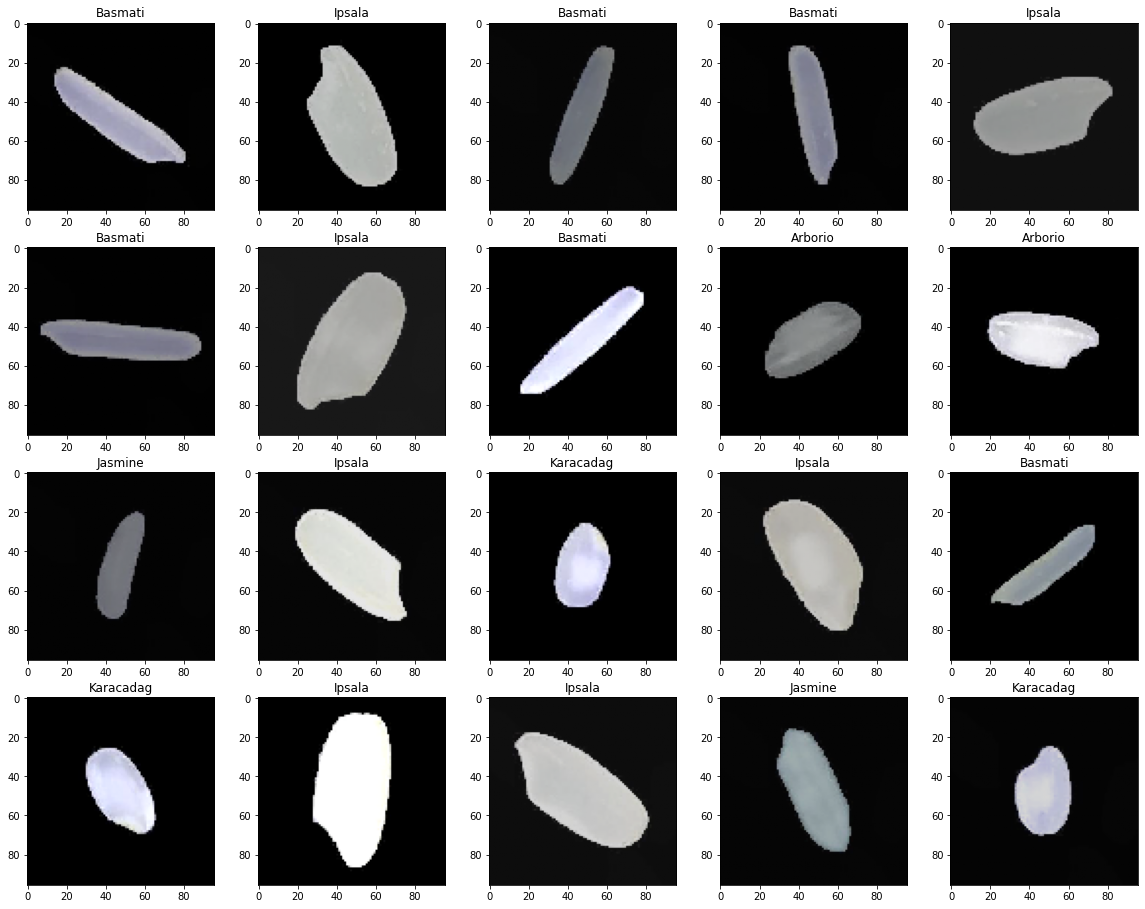

In [8]:
# Load images and their labels
images = open_images(x_train_paths[1:500])
labels = y_train[1:500]
fig =plt.figure(figsize=(20,20))
for i in range(20):
    idx = np.random.randint(1,500)
    plt.subplot(5,5,i+1)
    plt.title(labels[idx])
    plt.imshow(images[idx])
plt.show()

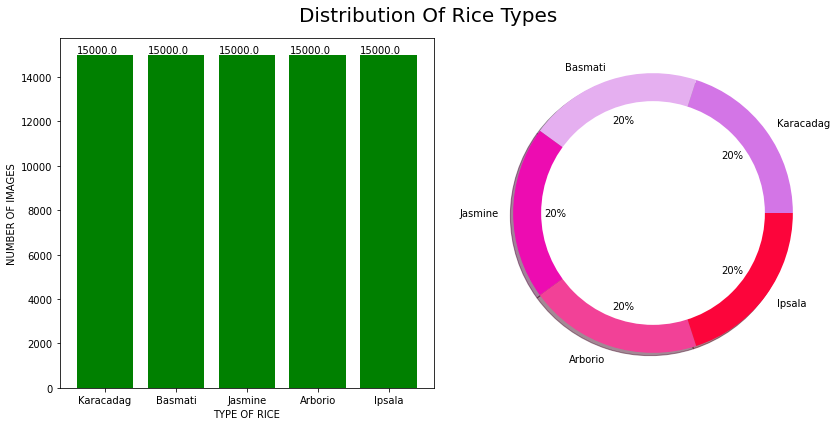

In [9]:
# Get types of rice
types_of_rice = list(os.listdir("../input/rice-image-dataset/Rice_Image_Dataset"))
types_of_rice.remove("Rice_Citation_Request.txt")

# Number of images in each folder
main_dir = "../input/rice-image-dataset/Rice_Image_Dataset"
num_images = [len(os.listdir(os.path.join(main_dir,rice))) for rice in types_of_rice]


# Create subplots
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

plt.suptitle("Distribution Of Rice Types",fontsize=20,color='black')

# Create a barplot
ax1.bar(types_of_rice,num_images,color='green')
ax1.set_xlabel("TYPE OF RICE")
ax1.set_ylabel("NUMBER OF IMAGES")

for p in ax1.patches:
    ax1.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()+100))
    
# Create a donout plot
colors=["#d375e6","#e5aff0","#ed0cb1","#f24197","#fc053b"]
ax2.pie(num_images,labels=types_of_rice,autopct='%1.0f%%', pctdistance=0.7,shadow=True,colors=colors)
ax2.add_artist(plt.Circle((0,0),0.8,fc='white'))

plt.tight_layout()
plt.show()

**Arborio**

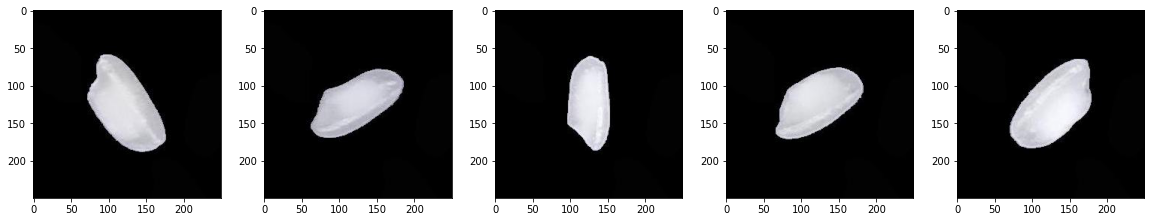

In [10]:
Arborio =[]
image_path ="../input/rice-image-dataset/Rice_Image_Dataset/Arborio"
for filename in os.listdir(image_path):
    Arborio.append(os.path.join(image_path, filename))
    
fig =plt.figure(figsize=(20,20))
for i in range(5):
    idx = np.random.randint(0,100)
    plt.subplot(5,5,i+1)
    image =plt.imread(Arborio[idx])
    plt.imshow(image)

**Basmati**

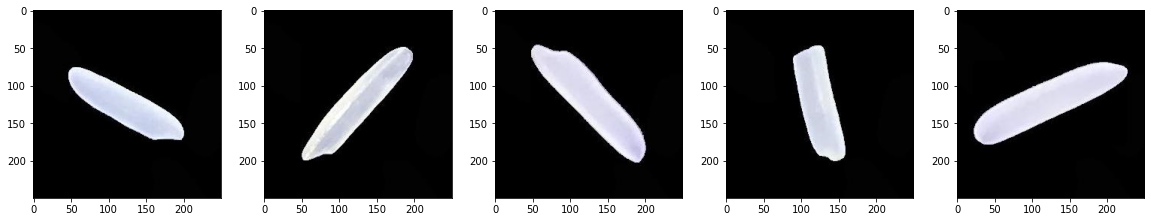

In [11]:
Basmati =[]
image_path ="../input/rice-image-dataset/Rice_Image_Dataset/Basmati"
for filename in os.listdir(image_path):
    Basmati.append(os.path.join(image_path, filename))
    
fig =plt.figure(figsize=(20,20))
for i in range(5):
    idx = np.random.randint(0,100)
    plt.subplot(5,5,i+1)
    image =plt.imread(Basmati[idx])
    plt.imshow(image)

**Ipsala**

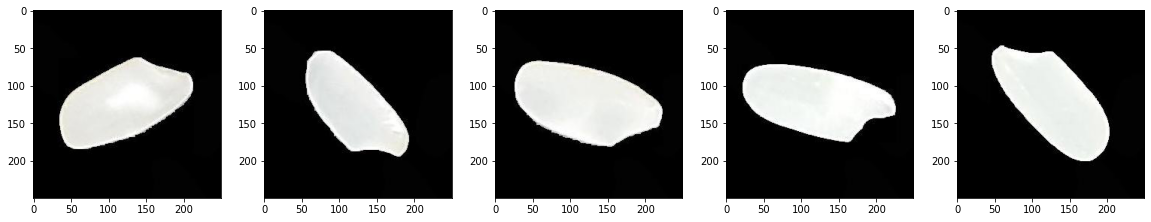

In [12]:
Ipsala =[]
image_path ="../input/rice-image-dataset/Rice_Image_Dataset/Ipsala"
for filename in os.listdir(image_path):
    Ipsala.append(os.path.join(image_path, filename))
    
fig =plt.figure(figsize=(20,20))
for i in range(5):
    idx = np.random.randint(0,100)
    plt.subplot(5,5,i+1)
    image =plt.imread(Ipsala[idx])
    plt.imshow(image)

**Jasmine**

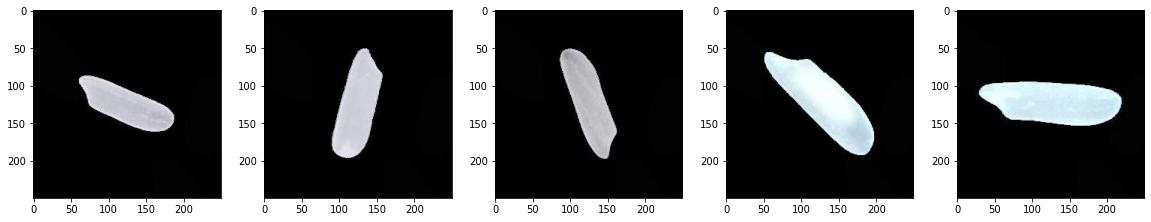

In [13]:
Jasmine =[]
image_path ="../input/rice-image-dataset/Rice_Image_Dataset/Jasmine"
for filename in os.listdir(image_path):
    Jasmine.append(os.path.join(image_path, filename))
    
fig =plt.figure(figsize=(20,20))
for i in range(5):
    idx = np.random.randint(0,100)
    plt.subplot(5,5,i+1)
    image =plt.imread(Jasmine[idx])
    plt.imshow(image)

**Karacadag**

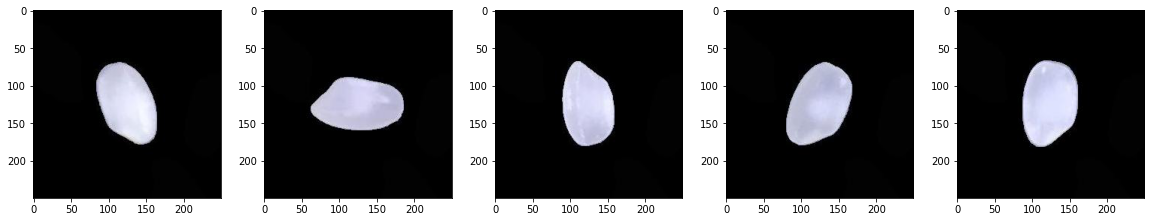

In [14]:
Karacadag =[]
image_path ="../input/rice-image-dataset/Rice_Image_Dataset/Karacadag"
for filename in os.listdir(image_path):
    Karacadag.append(os.path.join(image_path, filename))
    
fig =plt.figure(figsize=(20,20))
for i in range(5):
    idx = np.random.randint(0,100)
    plt.subplot(5,5,i+1)
    image =plt.imread(Karacadag[idx])
    plt.imshow(image)

In [15]:
IMAGE_SIZE = 96
def datagen(paths, labels, batch_size=12, epochs=3, augment=True):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths, augment=augment)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_labels(batch_labels)
            yield batch_images, batch_labels

In [16]:
Image_Size =[96,96]
#importing vgg19
mobilenet = VGG19(include_top = False ,input_shape =Image_Size +[3], weights ='imagenet')

2022-05-28 19:47:03.864341: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-28 19:47:03.868595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-28 19:47:03.869231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-28 19:47:03.870244: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 2s 0us/step


In [17]:
#not traning the complete layers of mobilenet 
for layer in mobilenet.layers:
    layer.trainable = False
    
X =Flatten()(mobilenet.output)
outlayers = Dense(5,activation='softmax')(X)

In [18]:
#creating instance of model
model =Model(inputs=mobilenet.input,outputs=outlayers)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

In [20]:
batch_size = 64
steps = int(len(x_train_paths)/batch_size)
epochs = 5
history = model.fit(datagen(x_train_paths, y_train, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

2022-05-28 19:47:09.217959: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-05-28 19:47:10.555958: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1054/1054 [==============================] - 463s 432ms/step - loss: 0.6023 - sparse_categorical_accuracy: 0.8716
Epoch 2/5
1054/1054 [==============================] - 140s 132ms/step - loss: 0.2566 - sparse_categorical_accuracy: 0.9369
Epoch 3/5
1054/1054 [==============================] - 140s 132ms/step - loss: 0.1873 - sparse_categorical_accuracy: 0.9509
Epoch 4/5
1054/1054 [==============================] - 139s 132ms/step - loss: 0.1523 - sparse_categorical_accuracy: 0.9595
Epoch 5/5
1054/1054 [==============================] - 139s 132ms/step - loss: 0.1297 - sparse_categorical_accuracy: 0.9653


In [21]:
batch_size=128
steps = int(len(x_val_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(x_val_paths, y_val, batch_size=batch_size, epochs=1, augment=False), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_labels(pred):
        y_pred.append(i)
    for i in decode_labels(y):
        y_true.append(i)

59it [00:58,  1.01it/s]


In [22]:
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

     Arborio     0.9610    0.9847    0.9727      1500
     Basmati     0.9559    0.9680    0.9619      1500
      Ipsala     0.9973    0.9960    0.9967      1500
     Jasmine     0.9621    0.9467    0.9543      1500
   Karacadag     0.9864    0.9667    0.9764      1500

    accuracy                         0.9724      7500
   macro avg     0.9725    0.9724    0.9724      7500
weighted avg     0.9725    0.9724    0.9724      7500



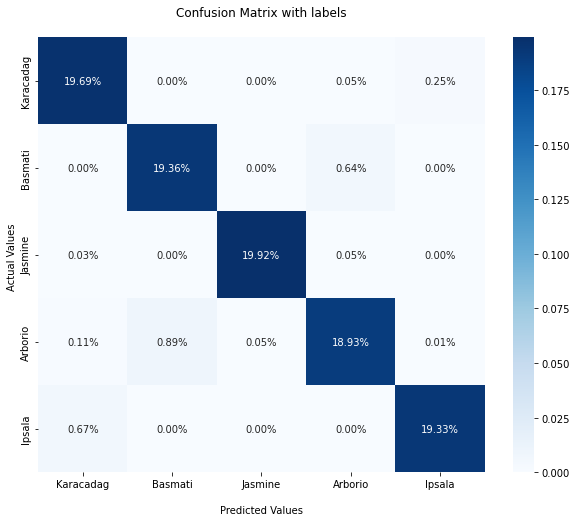

In [23]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(unique_labels)
ax.yaxis.set_ticklabels(unique_labels)

plt.show()

In [24]:
def predict(images):
    pred = model.predict(images)
    pred = np.argmax(pred, axis=-1)
    pred = decode_labels(pred)
    return pred

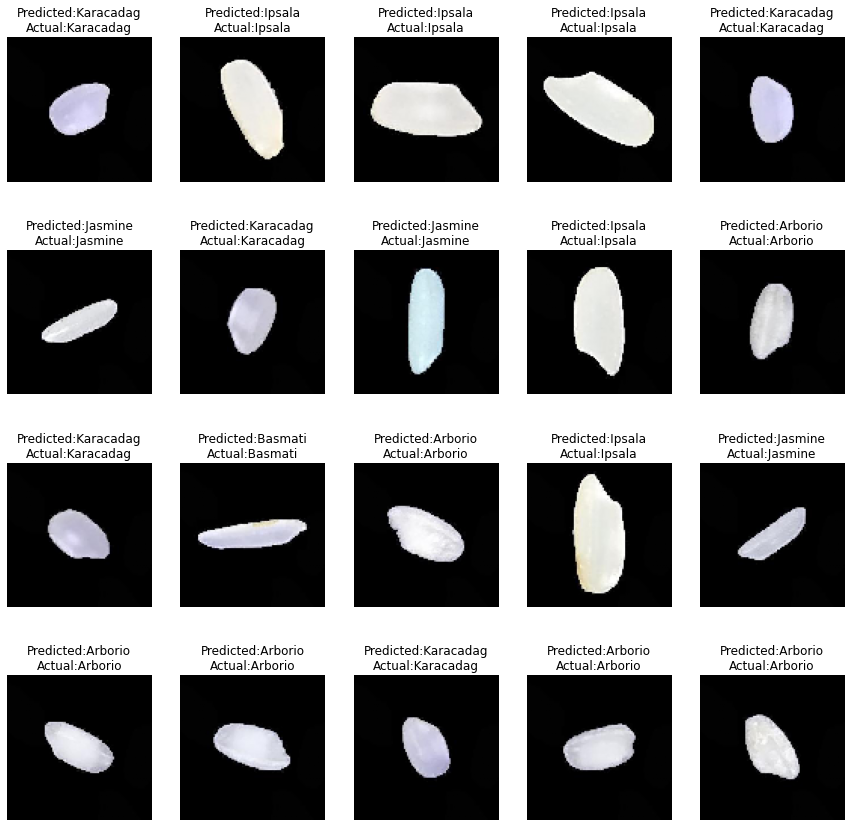

In [25]:
number_images= 20
idx = random.sample(range(len(y_val)), number_images)

labels = [y_val[x] for x in idx]
image_paths = [x_val_paths[x] for x in idx]
images = open_images(image_paths, augment=False)
pred = predict(images)

cols = 5
rows = 4
fig = plt.figure(figsize=(15,15))

for x in range(number_images):
    fig.add_subplot(rows, cols, x+1)
    plt.axis('off')
    plt.title('Predicted:'+str(labels[x])+'\nActual:'+str(labels[x]))
    plt.imshow(images[x])
plt.show()